In [1]:
import sys
sys.path.insert(0, '/home/ubuntu/pySBFitter')
sys.path

['/home/ubuntu/pySBFitter',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/ubuntu/km_test/km/lib/python3.6/site-packages',
 '/home/ubuntu/km_test/km/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [3]:
import tellurium as te
import matplotlib.pyplot as plt
from pySBFitter.namedTimeseries import NamedTimeseries, TIME
from pySBFitter.timeseriesPlotter import TimeseriesPlotter

In [4]:
rr = te.loadSBMLModel("BIOMD0000000514_url.xml")

In [5]:
# Extracting a model from Antimony
def mk_antimonyFile(sbml_path, ant_path):
    rr = te.loadSBMLModel(sbml_path)
    model = (rr.getAntimony())
    with open(ant_path, "w") as fd:
        fd.writelines(model)

In [6]:
mk_antimonyFile("BIOMD0000000514_url.xml", "out.ant")

In [7]:
rr2 = te.loada("BIOMD0000000514.antimony")

In [9]:
data = rr.simulate(0, 1800, 1800)
data_ts = NamedTimeseries(namedArray=data)

In [10]:
plotter = TimeseriesPlotter()

In [11]:
ts = data_ts.subsetColumns('Pyr_c')
arr = ts['Pyr_c'][1:] - ts['Pyr_c'][:-1]

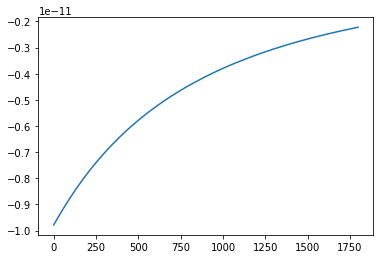

In [12]:
plt.plot(range(len(arr)), arr)

In [15]:
?plotter.plotTimeSingle

Signature: plotter.plotTimeSingle(timeseries1, **kwargs)
Docstring:
Constructs plots of single columns, possibly with a second
timeseries.

Parameters
---------
timeseries1: NamedTimeseries

A figure may contain 1 or more plot, and each plot may contain
1 or more line. Figure (f), plot (p), and line (c) are the possible
scope of an option.  If the option is singled valued, then it applies
to all instances of its scope. If it has multiple values, then the
index of the value corresponds to the instance within the scope.
A figure scope is always single valued.
        color: str
    (l) color of the line
    default = blue
columns: list
    (f) List of columns to plot
    default = []
legend: list
    (f) Tuple of str for legend
linestyle: str
    (l) Line style
marker: str
    (l) Marker for line
markersize: float
    (l) Size of marker for the line; >0
numCol: int
    (f) columns of plots
numRow: int
    (f) rows of plots
subplotWidthSpace: float
    (f) horizontal space between plots
s

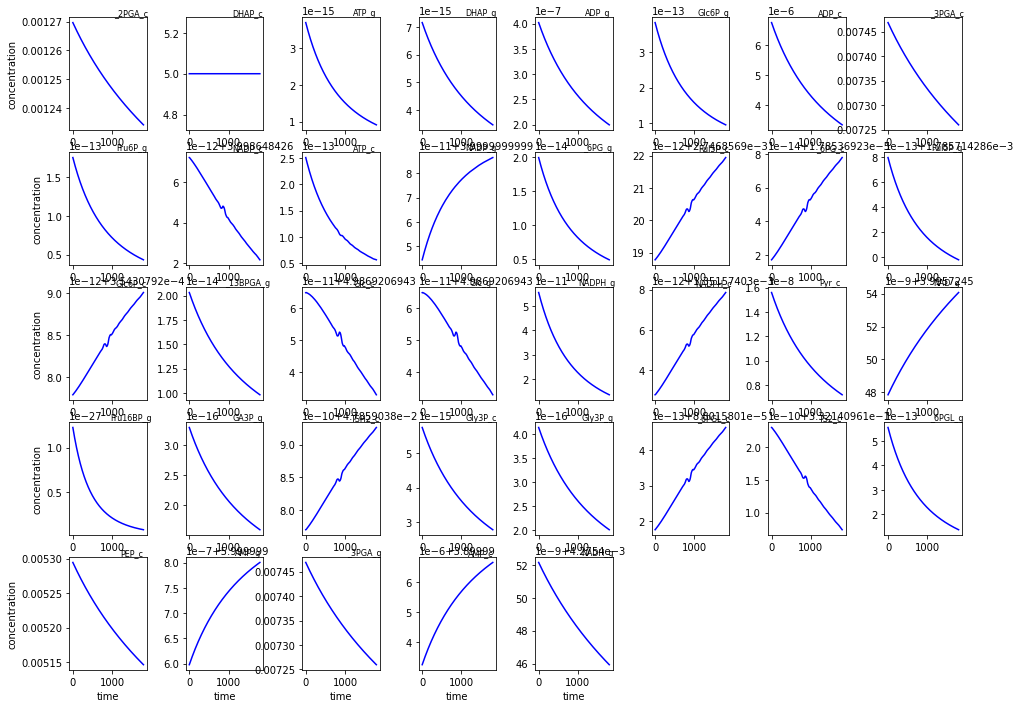

In [21]:
#plotter.plotTimeSingle(data_ts, columns=["DHAP_c", "DHAP_g", "Pyr_c", "PEP_c"])
plotter.plotTimeSingle(data_ts, numCol=8, figsize=(16,12), titlePosition=[0.8, 0.6], titleFontsize=8)